# DEMOSTRACIÓN


\begin{equation}
    E(x)= \frac{1}{2}\sum_{n=1}^{N}\left(t_{n}-f(x)\right)^{2}
\end{equation}

con $f(x)=\sum_{r=1}^{R}C_{r}\mathbb{1}{(x \in R_{r})}$ y $\hat{C}{k} =\frac{1}{N{k}}  \displaystyle\sum_{\{n| x_{n} \in R_{r}\}}t_{n}$\\

Derivadas parciales de $E(x)$

\begin{eqnarray}
\frac{\partial E \left( x \right)}{\partial C_{1}} & = \frac{\partial}{\partial C_{1}} \cdot\frac{1}{2}\cdot\sum_{n=1}^{N}\left(t_{n}-f(x) \right)^{2}= \frac{1}{2} \sum_{n=1}^{N}\frac{\partial}{\partial C_{1}} \left(t_{n}-f(x) \right)^{2}\\
 & = \frac{1}{2}\sum_{n=1}^{N} \frac{\partial}{\partial C_{1}}\left(t_{n}^{2}-2t_{n}f(x)+f^{2}(x)\right)\\
 & = \frac{1}{2}\sum_{n=1}^{N}\left[{\frac{\partial}{\partial C_{1}}t_{n}^{2}}-2t_{n}\frac{\partial}{\partial C_{1}}f(x)+\frac{\partial}{\partial C_{1}}f^{2}(x)\right]\\
 & = \frac{1}{2}\sum_{n=1}^{N}\left[-2t_{n}\frac{\partial}{\partial C_{1}}f(x)+\frac{\partial}{\partial C_{1}}f^{2}(x)\right]\\
\end{eqnarray}

\begin{eqnarray}
%\begin{split}
    \frac{\partial}{\partial C_{1}} f(x) = \frac{\partial}{\partial C_{1}}\displaystyle\sum_{r=1}^{R}C_{r}\mathbb{1}{(x \in R_{r})}\\
    =\frac{\partial}{\partial C_{1}} \left[C_{1}\mathbb{1}{(x \in R_{1})}\right]+{\frac{\partial}{\partial C_{1}}\left[ \displaystyle\sum_{r\neq1}^{R}C_{r}\mathbb{1}{(x \in R_{r})}\right]}\\
    & = \mathbb{1}{(x \in R_{1})}
%\end{split}
\end{eqnarray}
\begin{eqnarray}
    %\begin{split}
        \frac{1}{2}\sum_{n=1}^{N}\left[-2t_{n}\frac{\partial}{\partial C_{1}}f(x)+\frac{\partial}{\partial C_{1}}f^{2}(x)\right]& = \frac{1}{2}\sum_{n=1}^{N}\left[-2t_{n}\cdot \mathbb{1}{(x \in R_{1})}+2f(x)\cdot\frac{\partial}{\partial C_{1}}f(x)\right]\\
        =&\frac{1}{2}\sum_{n=1}^{N}\left[-2t_{n}\cdot \mathbb{1}{(x \in R_{1})}+2f(x)\cdot \mathbb{1}{(x \in R_{1})}\right]\\
        & = \sum_{n=1}^{N}\left[-t_{n}\cdot \mathbb{1}{(x \in R_{1})}+f(x)\cdot \mathbb{1}{(x \in R_{1})}\right]\\
        & = \sum_{n=1}^{N}\left[-t_{n}\cdot \mathbb{1}{(x \in R_{1})}+C_{1}\right]=\sum_{n=1}^{N}\left[-t_{n}\cdot \mathbb{1}{(x \in R_{1})}\right]+N\cdot C_{1}\\
        & = -\sum_{n=1}^{N}\left[t_{n}\cdot \mathbb{1}{(x \in R_{1})}\right]+N_{1}\cdot C_{1} =0 \\
        &  N_{1}\cdot C_{1}=\sum_{n=1}^{N}\left[t_{n}\cdot \mathbb{1}{(x \in R_{1})}\right]\\ C_{1}=\frac{\sum_{n=1}^{N}t_{n}}{N_{1}}
    %\end{split}
\end{eqnarray}
Al hacerlo recursivo llegamos a lo siguiente:
\begin{equation}
\begin{split}
C_{k}=\frac{\sum_{n=1}^{N}t_{n}}{N_{k}}
\end{split}
\end{equation}


# MODELO

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re 

In [128]:
bmv = "bmv_emisoras.csv" 
bmv = pd.read_csv(bmv)
bmv.head()


,key,Actividad Econ&oacutemica,E-mail,Fax,Fecha de Constitución,Fecha de listado en BMV,Historia de la Empresa,Oficinas Corporativas,Principales Productos y/o Servicios,Ramo,Relación con Inversionistas,Sector,Subramo,Subsector,Teléfono
0,AC,"ARCA CONTINENTAL ES UNA EMPRESA CONTROLADORA, ...",felipe.barquin@arcacontal.com,NaN,24-Sep-1980,13-Dec-2001,Arca Continental se formó en el año 2011 media...,"Av. San Jeronimo 813 Pte. San Jeronimo ,64640,...","Coca-Cola, Coca-Cola Light, Fanta, Sprite, Lif...",BEBIDAS,LIC. FELIPE BARQUIN (),PRODUCTOS DE CONSUMO FRECUENTE,PRODUCCIÓN DE BEBIDAS NO ALCOHÓLICAS,"ALIMENTOS, BEBIDAS Y TABACO",8181511400
1,ACCELSA,TENEDORA DE EMPRESAS DEDICADAS A SERVICIOS DE ...,m.altamirano@accel.com.mx,6144260056,09-Jan-1979,21-Oct-1988,"Accel, S.A. de C.V. surge de la escisión de Gr...",Circuito No. 5 del Parque Industrial Las Ameri...,"MANUFACTURA EMPAQUE, DISTRIBUCIÓN Y VENTA DE D...",SUMINISTROS Y SERVICIOS COMERCIALES,C.P. MIGUEL ALTAMIRANO (CONTRALOR CORPORATIVO),INDUSTRIAL,SERVICIOS COMERCIALES DIVERSIFICADOS Y PROFESI...,SUMINISTROS Y SERVICIOS COMERCIALES,6144260024
2,ACTINVR,TENENDORA DE ACCIONES Y EMPRESAS SUBSIDIARIAS,actinverir@actinver.com.mx,11036699,27-Jul-2004,11-Oct-2007,"Corporación Actinver, SAB de CV es una socieda...","GUILLERMO GONZALEZ CAMARENA 1200 PISOS 5, 9 Y ...",NaN,MERCADOS FINANCIEROS,PhD ENRIQUE COVARRUBIAS (RESPONSABLE DE RELACI...,SERVICIOS FINANCIEROS,CONTROLADORAS DE ENTIDADES DE SERVICIOS FINANC...,ENTIDADES FINANCIERAS,11036600
3,AEROMEX,SOCIEDAD CONTROLADORA A TRAVES DE SUS SUBSIDIA...,jwallden@aeromexico.com.mx,NaN,19-Mar-2002,14-Apr-2011,"Grupo Aeroméxico, S.A.B. de C.V., es una socie...",Av. Paseo de la Reforma 243 piso 25 Cuauhtemoc...,NaN,LÍNEAS AÉREAS,DON JONATHAN MARK WALLDEN (DIRECTOR DE PLANEAC...,INDUSTRIAL,LÍNEAS AÉREAS,TRANSPORTES,91324000
4,AGRIEXP,"COMPRA, PROCESAMIENTO Y COMERCIALIZACION DE FR...",agriexport@megared.net.mx,013312001721,31-Jul-1973,20-Dec-1996,EMPRESA FUNDADA EN 1973 CON EL OBJETO DE EXPOR...,FRENTE A LA ESTACION DEL FERROCARRIL SIN NUMER...,"FRESAS CONGELADAS, CITRICOS ENLATADOS, PEPINIL...",ALIMENTOS,L.C.P RICARDO ALCALA (GERENTE GENERAL),PRODUCTOS DE CONSUMO FRECUENTE,PRODUCCIÓN Y COMERCIALIZACIÓN DE ALIMENTOS,"ALIMENTOS, BEBIDAS Y TABACO",013312001721


In [129]:
ipc_path = "ipc.xlsx" 
market = pd.read_excel(ipc_path, index_col=0)
market.columns = [c.replace(" MF Equity", "")
                  .replace(" INDEX", "")
                  .replace("*", "")
                  .replace("TLEVICPO", "TLEVISA")
                  .replace("GCARSOA1", "GCARSO") for c in market]

In [139]:
emisoras_IPC = pd.DataFrame({"key":market.keys()})

In [140]:
for i in range(len(emisoras_IPC)):
    if(((emisoras_IPC.loc[i,"key"][-3:]=="CPO")==True)|
       ((emisoras_IPC.loc[i,"key"][-3:]=="UBD")==True)|
       ((emisoras_IPC.loc[i,"key"][-3:]=="UBL")==True)):
        emisoras_IPC.loc[i,"key"] = emisoras_IPC.loc[i,"key"][:-3]

In [141]:
df = emisoras_IPC.merge(bmv, on='key', how='left')
df= df.loc[:,["key","Sector"]]
df.head()


,key,Sector
0,KIMBERA,NaN
1,GAPB,NaN
2,CEMEX,MATERIALES
3,ASURB,NaN
4,GFNORTEO,NaN


In [142]:
for i in range(len(emisoras_IPC)):
    if (pd.isna(df.loc[i,"Sector"]) ==True):
        
        cadena = df.iloc[i,0][:len(df.iloc[i,0]) - 1]
        df.iloc[i,0] = cadena

df.head()


,key,Sector
0,KIMBER,NaN
1,GAP,NaN
2,CEMEX,MATERIALES
3,ASUR,NaN
4,GFNORTE,NaN


In [153]:
bmv
df2 = df.merge(bmv, on='key', how='left')
df2 = (df2.loc[:,["key","Sector_x","Sector_y"]]
        .drop(["Sector_x"], axis=1))


In [154]:
df2.rename(columns={"Sector_y":"Sector"}, inplace=True)
df2

,key,Sector
0,KIMBER,PRODUCTOS DE CONSUMO FRECUENTE
1,GAP,INDUSTRIAL
2,CEMEX,MATERIALES
3,ASUR,INDUSTRIAL
4,GFNORTE,SERVICIOS FINANCIEROS
5,KOF,PRODUCTOS DE CONSUMO FRECUENTE
6,AC,PRODUCTOS DE CONSUMO FRECUENTE
7,LAB,SALUD
8,FEMSA,PRODUCTOS DE CONSUMO FRECUENTE
9,OMA,INDUSTRIAL


In [145]:
Xall = market.drop("MEXBOL", axis=1)
emiso = pd.DataFrame(Xall.columns)
df_sec = pd.concat([emiso, df2], axis=1).drop("key",axis=1).set_index(0)
df_sec.head()


,Sector
0,
KIMBERA,PRODUCTOS DE CONSUMO FRECUENTE
GAPB,INDUSTRIAL
CEMEXCPO,MATERIALES
ASURB,INDUSTRIAL
GFNORTEO,SERVICIOS FINANCIEROS


In [146]:
X = Xall.groupby(df_c['Sector'],axis = 1).mean()
X.head()

Sector,ENERGÍA,INDUSTRIAL,MATERIALES,PRODUCTOS DE CONSUMO FRECUENTE,SALUD,SERVICIOS DE TELECOMUNICACIONES,SERVICIOS FINANCIEROS,SERVICIOS Y BIENES DE CONSUMO NO BÁSICO
DATE,,,,,,,,
2016-01-01,72.34,117.845714,58.346,108.824286,13.85,56.883333,50.148333,216.333333
2016-01-04,72.98,116.128571,57.482,106.207143,14.41,56.366667,49.115000,212.393333
2016-01-05,71.48,115.488571,57.648,105.451429,13.77,55.673333,48.971667,209.043333
2016-01-06,70.94,114.577143,56.514,107.150000,13.65,55.140000,48.645000,202.943333
2016-01-07,72.31,112.128571,56.122,106.498571,13.25,54.783333,47.453333,200.226667


In [119]:
Rmkt = X.pct_change().dropna()
y = (market["MEXBOL"].pct_change() > 0).astype(int)
X = Rmkt.join(y, how="inner")

y = X["MEXBOL"]
X = X.drop("MEXBOL", axis=1)
y.value_counts()

0    535
1    510
Name: MEXBOL, dtype: int64

In [95]:
train_period = "2019-10"
test_period = "2019-11-20"
Xtrain, ytrain = X[:train_period], y[:train_period]
Xtest, ytest = X[:test_period], y[:test_period]

In [164]:
from sklearn.pipeline import Pipeline
from numpy.random import uniform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix

In [102]:
param_c = uniform(0.1, 1, 280)

params = {
    "model__warm_start":[True,False],
    "model__C": param_c,
    #"model__penalty": ["l1","l2"],
    "poly__degree": [1,2]
    
}

pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LogisticRegression(penalty="l2"))
])


gcv = GridSearchCV(pipe, params, scoring="accuracy")
gcv.fit(Xtrain, ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=

In [162]:
gcv.best_params_

{'model__C': 0.997444462826737, 'model__warm_start': True, 'poly__degree': 1}

In [163]:
gcv.best_estimator_.named_steps["model"].coef_

array([[1.81162331, 2.53718982, 2.56213822, 1.9905591 , 1.89410918,
        2.01973225, 2.5651782 , 1.27150996]])

In [105]:
res = cross_validate(gcv, Xtrain, ytrain, scoring="accuracy",cv=5)
res

{'fit_time': array([34.56914926, 37.99857092, 35.88951397, 35.09012699, 35.21798205]),
 'score_time': array([0.00117302, 0.00091982, 0.00080919, 0.00080585, 0.0008111 ]),
 'test_score': array([0.755     , 0.775     , 0.705     , 0.765     , 0.79899497])}

In [58]:
res["test_score"].mean()

0.7608040201005025

## Metrics 

In [165]:
print("Precisión:", precision_score(ytest, yhat))
print("Recall:",recall_score(ytest, yhat))
print("F1:", f1_score(ytest, yhat))

Precisión: 0.9041916167664671
Recall: 0.6101010101010101
F1: 0.7285886610373944


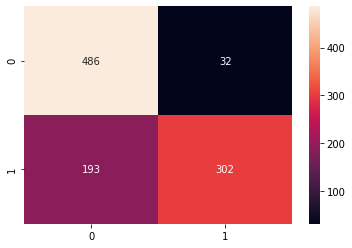

In [166]:
yhat = gcv.predict(Xtest)
con_matrix = confusion_matrix(ytest, yhat, labels=[0, 1])
sns.heatmap(con_matrix, annot=True,fmt="d")

In [159]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 0, 'Nivel de proba asignada')

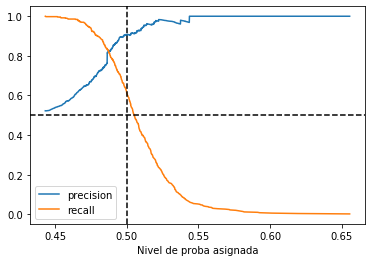

In [167]:
proba_estimate = gcv.predict_proba(Xtest)[:, 1]
prec, recall, threshold = precision_recall_curve(ytest, proba_estimate)

plt.plot(threshold, prec[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()
plt.axvline(x=0.5, linestyle="--", c="black")
plt.axhline(y=0.5, linestyle="--", c="black")
plt.xlabel("Nivel de proba asignada")